# Self-implemented Resnets on CIFAR10
An evaluation of a small Resnet on CIFAR10. Architecture very similar to the description given in original Resnet paper.

In [4]:
%load_ext autoreload
%autoreload 2

In [149]:
from cifar_utils import get_datasets, plot, show_preds, RESNET
from utils import train, plot_loss_acc, count_parameters, accuracy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm as bar
import matplotlib.pyplot as plt

In [127]:
FOLDER = ".//data//cifar//"
training_set, validation_set, mini_train_set, mini_test_set = get_datasets(FOLDER)
print(len(training_set), len(validation_set))

50000 10000


(32, 32, 3)


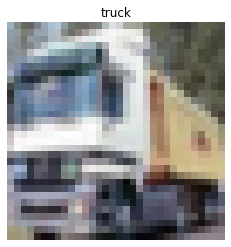

In [128]:
img = training_set.get_image(1)
print(img.shape)
plot(training_set.get_image(1), training_set.get_label(1))

In [129]:
training_gen = DataLoader(training_set, batch_size=128, shuffle=True)
valid_gen = DataLoader(validation_set, batch_size=128)
mini_train_gen = DataLoader(mini_train_set, batch_size=128, shuffle=True)
mini_test_gen = DataLoader(mini_test_set, batch_size=128)

In [144]:
net = RESNET(3)
crit = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), lr=0.01, weight_decay=0.0001)
count_parameters(net)

+---------------------------------+------------+
|             Modules             | Parameters |
+---------------------------------+------------+
|        net.0.conv.weight        |    432     |
|         net.0.bn.weight         |     16     |
|          net.0.bn.bias          |     16     |
|     net.2.conv1.conv.weight     |    2304    |
|      net.2.conv1.bn.weight      |     16     |
|       net.2.conv1.bn.bias       |     16     |
|     net.2.conv2.conv.weight     |    2304    |
|      net.2.conv2.bn.weight      |     16     |
|       net.2.conv2.bn.bias       |     16     |
|     net.3.conv1.conv.weight     |    2304    |
|      net.3.conv1.bn.weight      |     16     |
|       net.3.conv1.bn.bias       |     16     |
|     net.3.conv2.conv.weight     |    2304    |
|      net.3.conv2.bn.weight      |     16     |
|       net.3.conv2.bn.bias       |     16     |
|     net.4.conv1.conv.weight     |    2304    |
|      net.4.conv1.bn.weight      |     16     |
|       net.4.conv1.

272474

In [146]:
train_loss, train_acc, test_loss, test_acc = train(net, crit, accuracy, opt, training_gen, valid_gen, 20)


Epoch:1, T Loss:1.181, T acc:0.574 V Loss:1.289, V acc:0.542



Epoch:2, T Loss:0.945, T acc:0.666 V Loss:1.245, V acc:0.589



Epoch:3, T Loss:0.812, T acc:0.717 V Loss:1.216, V acc:0.612



Epoch:4, T Loss:0.753, T acc:0.739 V Loss:0.780, V acc:0.731



Epoch:5, T Loss:0.702, T acc:0.756 V Loss:0.817, V acc:0.731



Epoch:6, T Loss:0.675, T acc:0.768 V Loss:0.913, V acc:0.693



Epoch:7, T Loss:0.653, T acc:0.773 V Loss:0.856, V acc:0.712



Epoch:8, T Loss:0.638, T acc:0.779 V Loss:0.975, V acc:0.693



Epoch:9, T Loss:0.622, T acc:0.784 V Loss:0.889, V acc:0.719



Epoch:10, T Loss:0.615, T acc:0.788 V Loss:0.663, V acc:0.775



Epoch:11, T Loss:0.599, T acc:0.793 V Loss:0.895, V acc:0.711



Epoch:12, T Loss:0.601, T acc:0.794 V Loss:0.836, V acc:0.724



Epoch:13, T Loss:0.588, T acc:0.797 V Loss:0.791, V acc:0.744



Epoch:14, T Loss:0.580, T acc:0.799 V Loss:1.092, V acc:0.688



Epoch:15, T Loss:0.579, T acc:0.800 V Loss:0.788, V acc:0.731



Epoch:16, T Loss:0.570, T acc:0.802 V Loss:0.840, V acc:0.738



Epoch:17, T Loss:0.573, T acc:0.805 V Loss:0.672, V acc:0.782



Epoch:18, T Loss:0.564, T acc:0.805 V Loss:0.776, V acc:0.732



Epoch:19, T Loss:0.563, T acc:0.805 V Loss:0.690, V acc:0.770



Epoch:20, T Loss:0.557, T acc:0.809 V Loss:0.673, V acc:0.771


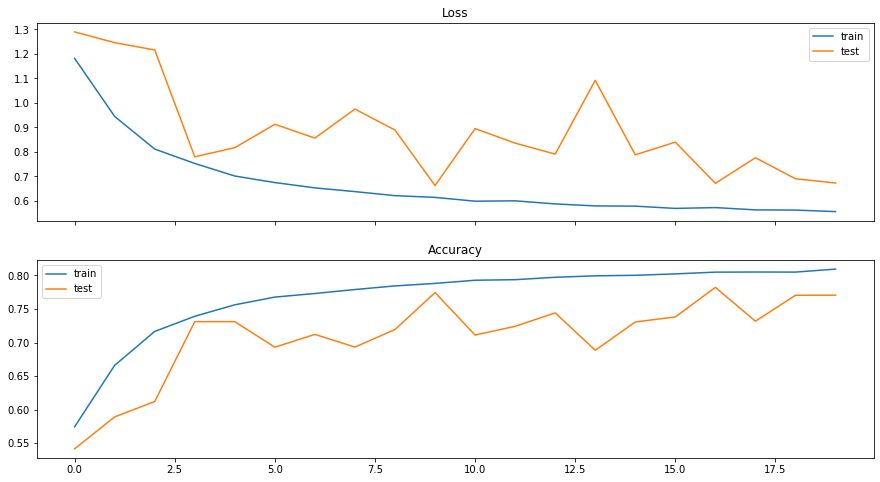

In [147]:
plot_loss_acc(train_loss, train_acc, test_loss, test_acc)

In [150]:
show_preds(net, mini_train_gen)

+---------+------------+---------------+
| Correct | Prediction | Correct Label |
+---------+------------+---------------+
|  False  |    ship    |    airplane   |
|   True  |    bird    |      bird     |
|   True  |    dog     |      dog      |
|   True  |    dog     |      dog      |
|  False  |    dog     |      frog     |
|   True  |   horse    |     horse     |
|   True  |   truck    |     truck     |
|   True  |   horse    |     horse     |
|   True  |    frog    |      frog     |
|   True  |    frog    |      frog     |
|   True  |    deer    |      deer     |
|  False  |   truck    |    airplane   |
|   True  |  airplane  |    airplane   |
|   True  |    cat     |      cat      |
|   True  |  airplane  |    airplane   |
|   True  |   truck    |     truck     |
|   True  |   horse    |     horse     |
|   True  |  airplane  |    airplane   |
|   True  |    ship    |      ship     |
|   True  |    frog    |      frog     |
|   True  | automobile |   automobile  |
|   True  |   tr